<a href="https://colab.research.google.com/github/tricktx/Dados_Marginais_ISP/blob/main/Dados_Marginais_ISP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install basedosdados

In [2]:
import pandas as pd
import basedosdados as bd
import matplotlib.pyplot as plt
import seaborn as sns
df = bd.read_table(dataset_id='br_isp_estatisticas_seguranca',
table_id='taxa_evolucao_anual_municipio',
billing_project_id="dados-marginais-365014")

Downloading: 100%|██████████| 644/644 [00:00<00:00, 1236.87rows/s]


In [3]:
df = df[['ano',
       'municipio',
       'regiao_rj',
       'hom_doloso',
       'hom_culposo',
       'cvli',
       'hom_por_interv_policial',
       'estupro',
       'roubo_celular',
       'roubo_carga',
       'furto_veiculos',
       'estelionato',
       'posse_drogas',
       'trafico_drogas',
       'pol_militares_mortos_serv',
       ]]

In [4]:
df.head()

,ano,municipio,regiao_rj,hom_doloso,hom_culposo,cvli,hom_por_interv_policial,estupro,roubo_celular,roubo_carga,furto_veiculos,estelionato,posse_drogas,trafico_drogas,pol_militares_mortos_serv
0,2014,angra dos reis,interior,40.55,16.76,41.09,1.08,49.75,12.98,5.41,283.18,105.98,104.90,109.22,0.00
1,2015,angra dos reis,interior,48.86,14.87,48.86,6.90,44.08,14.34,8.50,281.18,106.76,90.82,131.72,0.00
2,2016,angra dos reis,interior,44.39,9.92,45.43,3.66,29.24,27.15,6.79,306.43,94.51,43.86,119.58,0.00
3,2017,angra dos reis,interior,44.70,18.50,44.70,13.36,30.83,29.80,5.65,201.79,82.21,55.49,133.59,0.00
4,2018,angra dos reis,interior,65.87,9.48,66.36,25.45,36.43,42.91,17.46,171.28,66.36,33.93,139.72,2.22


### Comparativo entre as regiões relacionados a homicídios dolosos

In [5]:
df_regiao_doloso = df['hom_doloso'].value_counts().reset_index()
df_regiao_doloso = df.groupby('regiao_rj')[['hom_doloso']].sum().reset_index()
df_regiao_doloso['porcentagem']  = round(df_regiao_doloso['hom_doloso'] / df_regiao_doloso['hom_doloso'].sum()*100,2)
df_regiao_doloso.sort_values('porcentagem', ascending = False)

,regiao_rj,hom_doloso,porcentagem
3,interior,4099.61,47.59
0,baixada fluminense,3807.08,44.19
2,grande niteroi,576.40,6.69
1,capital,132.11,1.53


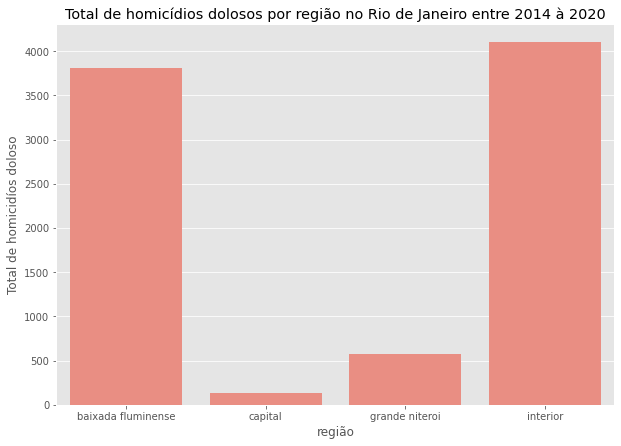

In [6]:
plt.style.use('ggplot')
plt.figure(figsize=(10,7)) 

sns.barplot(data=df_regiao_doloso,
            x = 'regiao_rj',
            y = 'hom_doloso',
            color = 'salmon',
            linewidth=0.5)

plt.xlabel('região')
plt.ylabel('Total de homicidíos doloso')
plt.title('Total de homicídios dolosos por região no Rio de Janeiro entre 2014 à 2020')

plt.show()



`* Interessante perceber que majoritariamente a taxa de homocídios dolosos no Rio de Janeiro se concentra no Interior e na Baixada Fluminense.`



1.   Interior - 4099.61 mil pessoas - 47.59%
2.   Baixada Fluminense	- 3807.08 - 44.19%





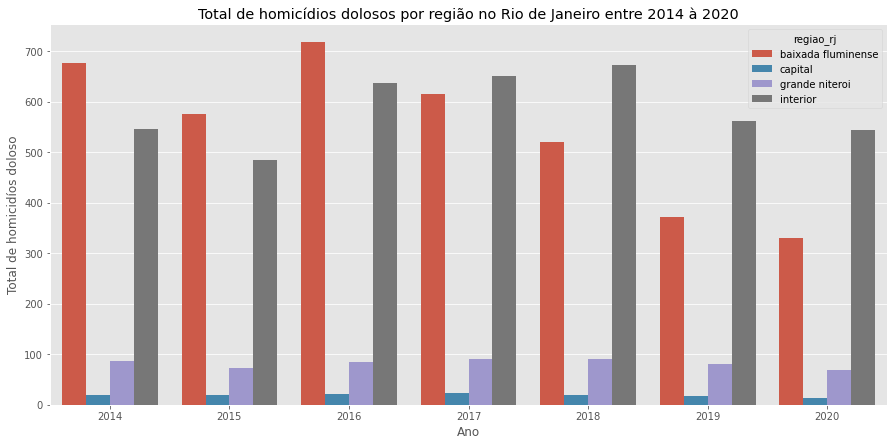

In [7]:
df_regiao_ano = df.groupby(['ano', 'regiao_rj'])['hom_doloso'].sum().reset_index()

plt.style.use('ggplot')
plt.figure(figsize=(15,7)) 

sns.barplot(data=df_regiao_ano,
            x = 'ano',
            y = 'hom_doloso',
            hue = 'regiao_rj',
#            color = 'salmon',
            linewidth=0.5)

plt.xlabel('Ano')
plt.ylabel('Total de homicidíos doloso')
plt.title('Total de homicídios dolosos por região no Rio de Janeiro entre 2014 à 2020')

plt.show()



`*  Comparativo entre regiões `




Enquanto grande niterói, capital e interior se mantém constante aos passar dos anos relacionado a homicídios dolosos, a baixada fluminense tem uma queda gradativa a partir de 2016.

### Analise a partir da baixada Fluminense

In [10]:
df_baixada = df.query('regiao_rj == ["baixada fluminense"]')
df_baixada.head()

,ano,municipio,regiao_rj,hom_doloso,hom_culposo,cvli,hom_por_interv_policial,estupro,roubo_celular,roubo_carga,furto_veiculos,estelionato,posse_drogas,trafico_drogas,pol_militares_mortos_serv
56,2014,belford roxo,baixada fluminense,48.40,3.34,49.02,13.35,34.84,21.49,44.43,337.14,67.59,2.50,42.14,0.00
57,2015,belford roxo,baixada fluminense,35.96,3.12,36.58,9.77,28.68,53.21,35.96,348.51,60.48,4.57,72.75,0.00
58,2016,belford roxo,baixada fluminense,41.89,1.82,42.50,10.73,22.26,67.39,69.41,326.86,63.54,3.04,69.01,6.51
59,2017,belford roxo,baixada fluminense,52.04,4.24,54.06,6.25,25.01,98.03,98.23,373.28,48.00,0.81,46.59,2.15
60,2018,belford roxo,baixada fluminense,41.68,4.72,44.63,18.28,24.38,118.16,119.74,311.40,63.70,1.77,48.76,2.22


In [11]:
df_baixada_hom_doloso = df_baixada['hom_doloso'].value_counts().reset_index
df_baixada_hom_doloso = df_baixada.groupby('ano')[['hom_doloso']].sum().reset_index()
df_baixada_hom_doloso.sort_values('hom_doloso', ascending=False)

,ano,hom_doloso
2,2016,717.80
0,2014,676.21
3,2017,614.61
1,2015,575.60
4,2018,521.21
5,2019,371.65
6,2020,330.00


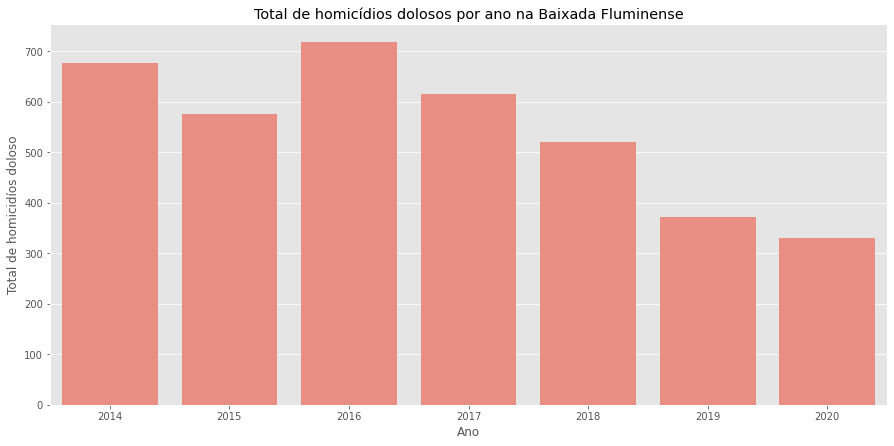

In [12]:
plt.style.use('ggplot')
plt.figure(figsize=(15,7)) 

sns.barplot(data=df_baixada_hom_doloso,
            x = 'ano',
            y = 'hom_doloso',
            color = 'salmon',
            linewidth=0.5)

plt.xlabel('Ano')
plt.ylabel('Total de homicidíos doloso')
plt.title('Total de homicídios dolosos por ano na Baixada Fluminense')

plt.show()

`Total de homicídios dolosos por ano`

Podemos notar uma queda significativa na taxa de homicídios dolosos na baixada Fluminense


* Podemos notar uma queda significativa na taxa de homicídios dolosos na baixada Fluminense.
* Uma redução maior que 50% na taxa de homícios dolosos durante 7 anos.






In [13]:
df_baixada_hom_doloso_municipio = df_baixada[['municipio', 'hom_doloso', 'hom_culposo']]
df_baixada_hom_doloso_municipio.groupby(['municipio'], dropna=False).sum().sort_values(by = 'hom_doloso', ascending=False).reset_index()

,municipio,hom_doloso,hom_culposo
0,queimados,497.48,70.94
1,japeri,382.79,50.56
2,itaguai,334.46,141.28
3,nova iguacu,319.91,73.61
4,seropedica,311.43,166.42
5,guapimirim,305.02,206.90
6,belford roxo,290.69,26.81
7,duque de caxias,272.71,74.03
8,mage,271.41,61.86
9,paracambi,228.30,61.26


`índices de homício doloso`

*   Cidade com maior índice de homício doloso: Queimados - 497.48	
Cidade com menor índice de homício doloso: Nilopolis - 169.98

`índices de homício culposo`


*   Município com maior índice de homício culposo: guapimirim - 206.90
*   Município com menor índice de homício culposo: Belford Roxo - 26.81




### Indice de homício culposo por região na Baixada Fluminense

In [17]:
df_baixada_hom_culposo = df_baixada.groupby('ano')[['hom_culposo']].sum().reset_index()
df_baixada_hom_culposo.sort_values('ano', ascending=True)

,ano,hom_culposo
0,2014,143.45
1,2015,135.25
2,2016,160.14
3,2017,178.73
4,2018,146.85
5,2019,163.16
6,2020,114.95


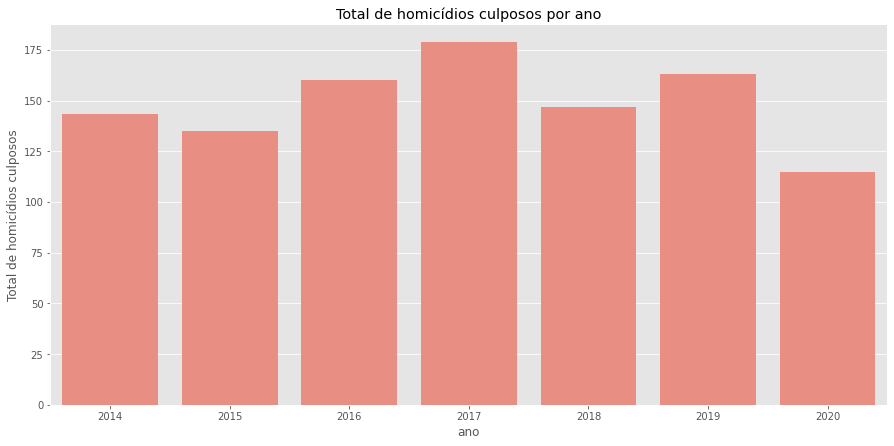

In [15]:
plt.style.use('ggplot')
plt.figure(figsize=(15,7)) 

sns.barplot(data=df_baixada_hom_culposo,
            x = 'ano',
            y = 'hom_culposo',
            color = 'salmon',
            linewidth=0.5)

plt.xlabel('ano')
plt.ylabel('Total de homicídios culposos')
plt.title('Total de homicídios culposos por ano')

plt.show()

`taxa de homicídios culposos na baixada fluminense`


* Percebemos que os dados se mantém constantes durante os anos de 2014 à 2021 na baixada fluminense.






In [36]:
df_interior = df.query("regiao_rj == 'interior'")
df_interior_culposo = df_interior.groupby('ano')[['hom_culposo']].sum().reset_index()
df_interior_culposo['porcentagem'] = round(df_interior_culposo['hom_culposo'] / df_interior_culposo['hom_culposo'].sum()*100,2)
df_interior_culposo.sort_values('ano', ascending=True)

,ano,hom_culposo,porcentagem
0,2014,465.23,18.10
1,2015,381.69,14.85
2,2016,347.28,13.51
3,2017,400.06,15.57
4,2018,321.26,12.50
5,2019,342.80,13.34
6,2020,311.38,12.12


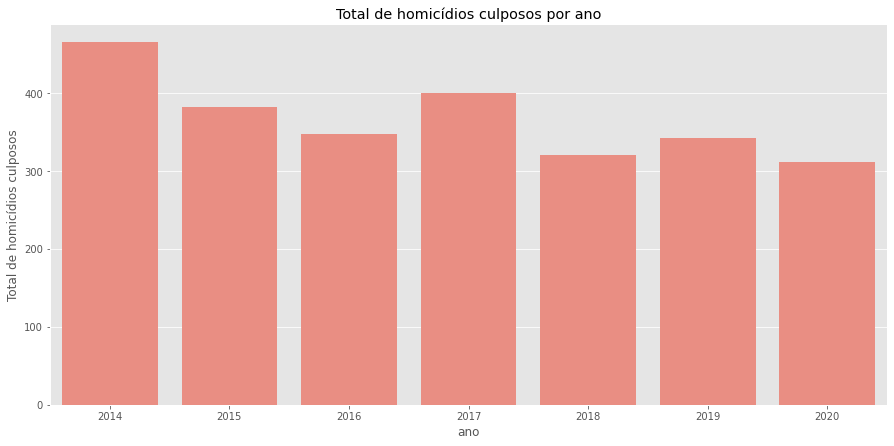

In [37]:
plt.style.use('ggplot')
plt.figure(figsize=(15,7)) 

sns.barplot(data=df_interior_culposo,
            x = 'ano',
            y = 'hom_culposo',
            color = 'salmon',
            linewidth=0.5)

plt.xlabel('ano')
plt.ylabel('Total de homicídios culposos')
plt.title('Total de homicídios culposos por ano')

plt.show()

`Taxa de homícios culposos no interior do Rio de Janeiro por ano`

A taxa de homício culposo no interior do Rio de Janeiro vem diminuindo de forma gradativamente nos últimos anos.

### Comparativo entre as regiões relacionados a homicídios culposos

In [41]:
df_regiao_culposo = df.groupby(['regiao_rj'])[['hom_culposo']].sum().reset_index()
df_regiao_culposo['porcentagem'] = round(df_regiao_culposo['hom_culposo'] / df_regiao_culposo['hom_culposo'].sum()*100,2)
df_regiao_culposo.sort_values('hom_culposo', ascending=False)

,regiao_rj,hom_culposo,porcentagem
3,interior,2569.70,64.60
0,baixada fluminense,1042.53,26.21
2,grande niteroi,303.91,7.64
1,capital,61.56,1.55


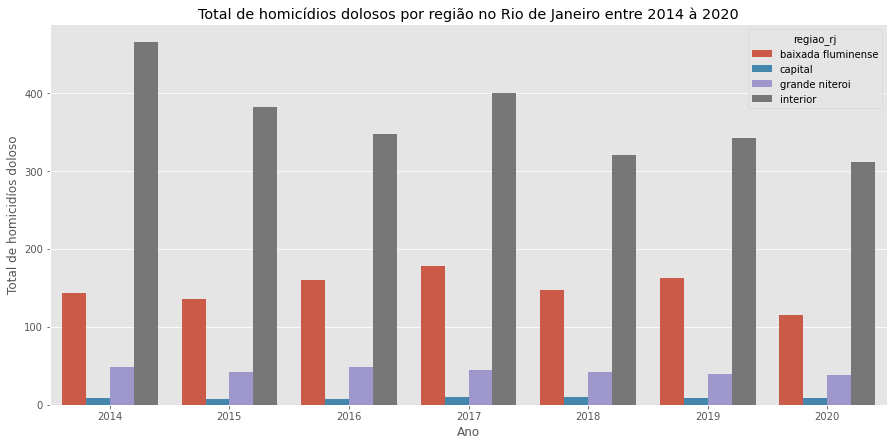

In [24]:
plt.style.use('ggplot')
plt.figure(figsize=(15,7)) 

sns.barplot(data=df_regiao_culposo,
            x = 'ano',
            y = 'hom_culposo',
            hue = 'regiao_rj')

plt.xlabel('Ano')
plt.ylabel('Total de homicidíos doloso')
plt.title('Total de homicídios dolosos por região no Rio de Janeiro entre 2014 à 2020')

plt.show()